## #Detecting Hate Speech and Offensive Language

In [182]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as st
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
import math
#from __future__ import division
from os import listdir
import string

In [242]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#from spellchecker import SpellChecker
nltk.download('stopwords')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import numpy as np
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [205]:
from collections import Counter
from wordcloud import WordCloud

In [680]:
raw = pd.read_csv('labeled_data.csv', index_col=[0])

In [685]:
df = raw[['class', 'tweet']]
df.sample(6)

,class,tweet
15599,1,RT @FriendZoneCEO: The go-to insult is always ...
15612,2,RT @FriendlyAssh0le: Todays Horoscope: \n\nyou...
4142,1,"@MarcSx9 lmaooo dj&#8217;s stranger danger, im..."
1776,1,&#8220;@daijahshardaee: I feel sorry for whoev...
1788,1,&#8220;@dreadHEADkidd69: pussy prolly taste li...
11311,1,"I want my bitch to answer if my ex calling, wi..."


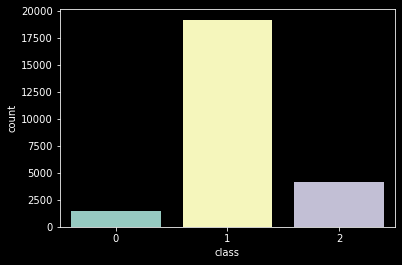

In [495]:
sns.countplot(df['class'])
plt.show()

In [682]:
df.iloc[51:61, :]

,class,tweet
51,1,""" yall niggas b cuffing hoes cause yall aint n..."
52,1,""" you dodge a bullet "" &#128517; &#8220;@DaRea..."
53,1,""" young Pill Chamberlain these bitches love my..."
54,1,"""&#128514;&#128514;&#128514;&#128514;&#128514;..."
55,1,"""&#128514;&#128514;&#128514;&#128514;&#128514;..."
56,1,"""&#128514;&#128514;&#128514;@The_Paradox: And ..."
57,1,"""&amp; he's gone always be a hoe"""
58,1,"""...Son of a bitch took my Tic Tacs.""\n\nI lik..."
59,1,"""..All I wanna do is get money and fuck model ..."
60,1,"""@2015seniorprobs: I probably wouldn&#8217;t m..."


In [683]:
df['tweet'].values[100:300] #sample tweets

array(['"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh',
       '"@Coley_Cee: @lil_aerii girl you know I was spitting that G shit to you &amp; you was going lbvs"bitch plz',
       '"@Coley_Cee: Let me make a couple tweets off cuzzo page, so I won\'t get in twitter jail."lmao bitch don\'t trick me again',
       '"@ComedyPosts: Harlem shake is just an excuse to go full retard for 30 seconds."',
       '"@ComedyTruth: amen miley &#128591; http://t.co/P2Kb2tfyxr"okay, but she don\'t need to act like a hoe just bc she\'s "emotionally damaged" foh',
       '"@CoryBandz: having one loyal female is wayyyyy better than having hoes , idc &#128175;"',
       '"@Crhedrys: Pussy licking pussy.... meow meow #StopWhitePeople2014 &#128049; https://t.co/KeegDCjS5K&#8221;""""\n\n&#128533;',
       '"@DBAB_Holloway: Check out our 12th man. #CowboysNation" even with all those faggot ny fans in the stands',
       '"@

### Removing Noise

In [686]:
def tweetLowercase(col: str):
    df[col] = df[col].str.lower()

tweetLowercase('tweet')

In [687]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda tweet: remove_urls(tweet))

In [688]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text) 

df['tweet'] = df['tweet'].apply(lambda tweet: remove_html(tweet))

In [689]:
STOPWORDS = set(st.words('english'))
def remove_stopwords(text):
    return " ".join([token for token in str(text).split() if token not in STOPWORDS])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_stopwords(tweet))

In [690]:
def remove_digits(text):
    return " ".join([token for token in str(text).split() if token.isalpha()])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_digits(tweet))

In [691]:
def removeSingleLetters(text):
    return " ".join([token for token in str(text).split() if len(token)>2])

df["tweet"] = df["tweet"].apply(lambda tweet: removeSingleLetters(tweet))

In [692]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_rarewords(tweet))

In [693]:
def rem_https(text):
    return " ".join([re.sub(r"https?://[A-Za-z0-9./]+", '', word) for word in str(text).split()])

df["tweet"] = df["tweet"].apply(lambda tweet: rem_https(tweet))

In [694]:
df["tweet"] = df["tweet"].apply(lambda tweet: re.sub(r"https?", '', tweet))

#### Stemming

In [247]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...


True

In [695]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["tweet"] = df["tweet"].apply(lambda tweet: stem_words(tweet))

In [696]:
cnt = Counter()
for text in df["tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)        

[('bitch', 9439),
 ('hoe', 3460),
 ('like', 2757),
 ('fuck', 2126),
 ('pussi', 1803),
 ('get', 1758),
 ('nigga', 1752),
 ('ass', 1483),
 ('got', 1286),
 ('shit', 1068),
 ('lol', 919),
 ('trash', 867),
 ('know', 837),
 ('love', 736),
 ('look', 732),
 ('want', 726),
 ('make', 702),
 ('one', 683),
 ('say', 644),
 ('call', 607)]

In [710]:
df['tweet'].values[100:300] 

array(['lmaooooooooooo nigga want like depress',
       'girl know spit shit go plz',
       'let make coupl tweet cuzzo get twitter bitch trick',
       'harlem shake excus full retard',
       'amen miley need act like hoe foh',
       'one loyal femal wayyyyy better hoe idc', 'pussi lick meow meow',
       'check even faggot fan stand',
       'happen vixen ent got ran threw side like foothil bitch',
       'bitch okay nude pat wow', 'fuck blacklist hold anyway',
       'fuck wrong nobodi know', 'yall shut make bitch', 'hate type',
       'got bitch ever top', 'basebal season love start',
       'littl stupid bitch fuck',
       'realli ask dead ass seriou could say lol',
       'earli bird night wise',
       'overdos heavi drug sound bad pussi shit everi',
       'pit bull photograph love fairi tale creatur fairi tale',
       'tweet lol', 'long laker trash could hahaha',
       'say anyth kiss faggot',
       'play cheat wear khaki colour haircut yup', 'could fat ass bitch',
    

In [699]:
def get_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

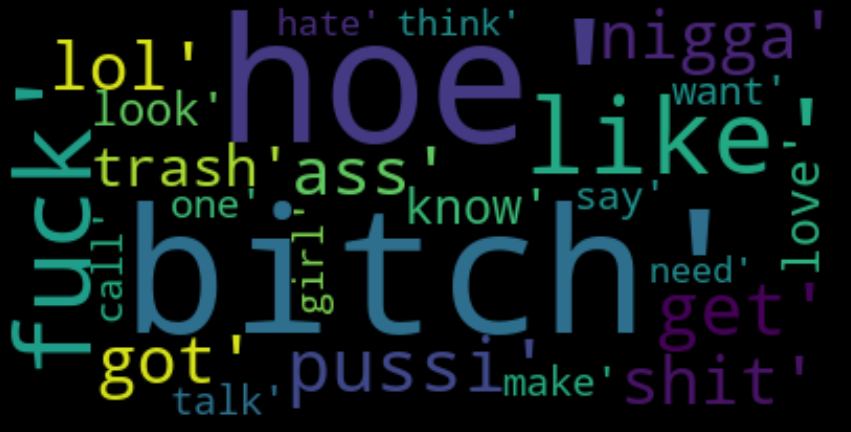

In [700]:
get_wordcloud(str(cnt.most_common(25)))

### Bag-of-Words & Logistic Regression with Oversampling

In [701]:
n_off, n_none, n_hate = df['class'].value_counts()
n_hate, n_off, n_none 

(1430, 19190, 4163)

In [702]:
df_hate = df[df['class'] == 0]
df_off = df[df['class'] == 1]
df_none = df[df['class'] == 2]

In [703]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
1    19190
0    19190
2    19190
Name: class, dtype: int64


In [704]:
x = df_over['tweet']
y = df_over.drop('tweet', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,\
test_size = 0.10, random_state = 42, stratify=df_over['class'])

In [705]:
def bow_vectorizer(c_train, c_vad):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    X_train = vectorizer.fit_transform(c_train).toarray()
    X_vad = vectorizer.transform(c_vad).toarray()
    return X_train, X_vad

In [706]:
x_train, x_test = bow_vectorizer(x_train, x_test)
x_train.shape, x_test.shape

((51813, 1010), (5757, 1010))

In [707]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [708]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.79      0.80      1919
     class 1       0.81      0.75      0.78      1919
     class 2       0.83      0.92      0.87      1919

    accuracy                           0.82      5757
   macro avg       0.82      0.82      0.82      5757
weighted avg       0.82      0.82      0.82      5757

